In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error




In [3]:
# Load the dataset
df = pd.read_csv('exams.csv')

# Display the first few rows of the dataset
df.head()



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [4]:
# Display the shape of the dataset
df.shape

# Check the column names
#print("Columns:", df.columns)
#df.columns
# Get a concise summary of the dataset
#print(df.info())
df.info()
# Display basic statistical information
#print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [22]:
# Check for missing values
print(df.isnull().sum())


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [5]:
# Perform one-hot encoding on categorical columns
df_encoded = pd.get_dummies(df, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'])

# Display the encoded dataset
print(df_encoded.head())


   math score  reading score  writing score  gender_female  gender_male  \
0          59             70             78              1            0   
1          96             93             87              0            1   
2          57             76             77              1            0   
3          70             70             63              0            1   
4          83             85             86              1            0   

   race/ethnicity_group A  race/ethnicity_group B  race/ethnicity_group C  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       1                       0   
4                       0                       0                       0   

   race/ethnicity_group D  race/ethnicity_group E  \
0                       1        

In [6]:
# Separate the features (X) and the target variable (y)
X = df_encoded.drop('math score', axis=1)  # Features
y = df_encoded['math score']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (800, 19)
X_test shape: (200, 19)
y_train shape: (800,)
y_test shape: (200,)


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create an instance of the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 32.05611916199999


In [9]:
from sklearn.metrics import r2_score, mean_absolute_error

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


R-squared: 0.8559106521618941
Mean Absolute Error: 4.614513634084679


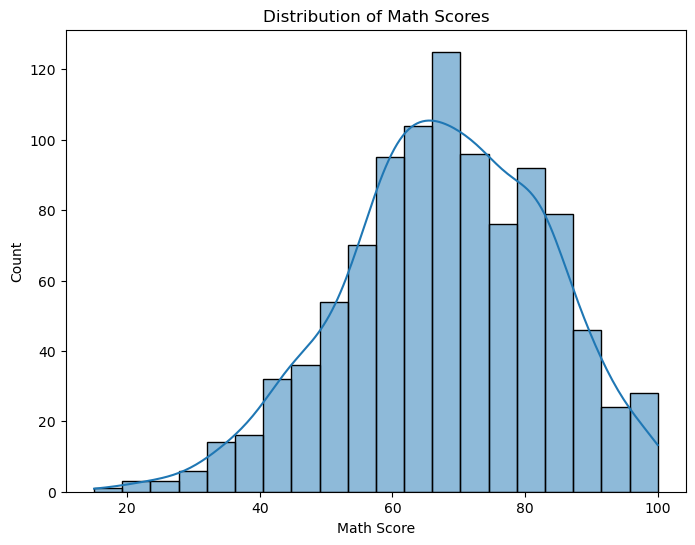

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5636\651968972.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="RdYlBu")


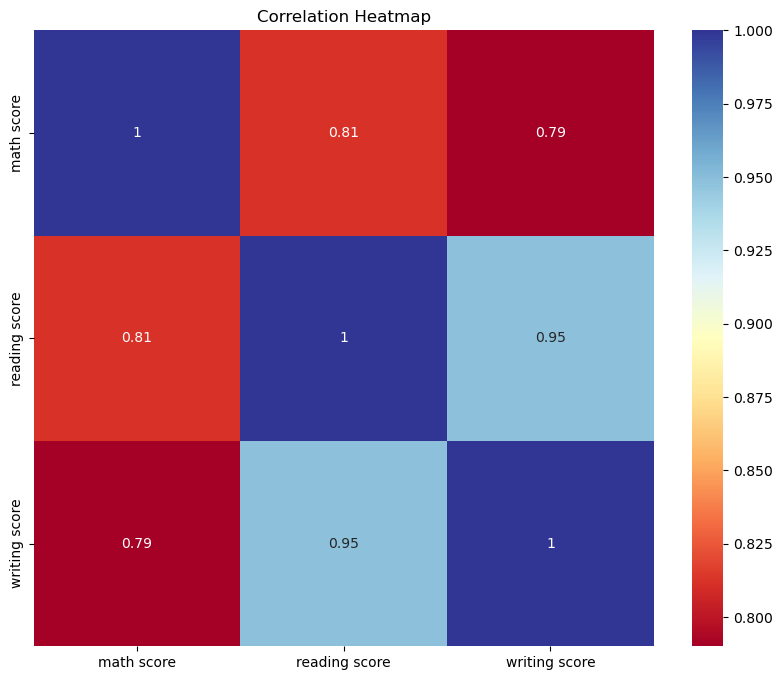

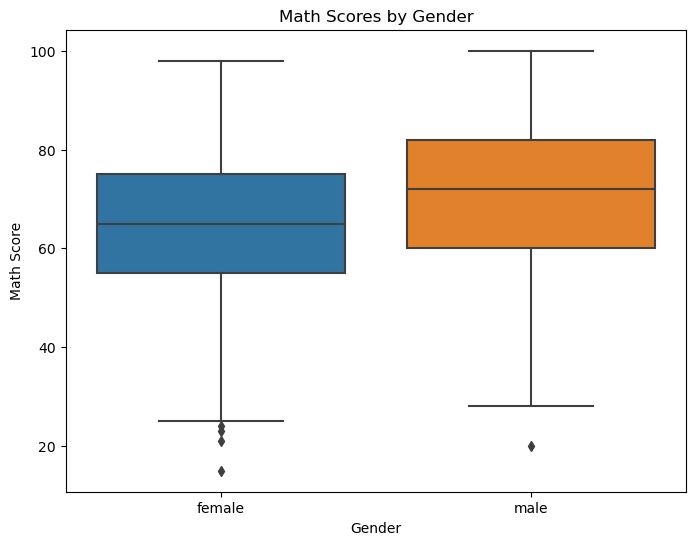

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of math scores
plt.figure(figsize=(8, 6))
sns.histplot(df['math score'], kde=True)
plt.title("Distribution of Math Scores")
plt.xlabel("Math Score")
plt.ylabel("Count")
plt.show()

# Visualize the correlation between variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="RdYlBu")
plt.title("Correlation Heatmap")
plt.show()

# Visualize the boxplot of math scores by gender
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['gender'], y=df['math score'])
plt.title("Math Scores by Gender")
plt.xlabel("Gender")
plt.ylabel("Math Score")
plt.show()

# Additional visualizations if needed
# ...


     reading score  writing score  gender_female  gender_male  \
0               70             78              1            0   
1               93             87              0            1   
2               76             77              1            0   
3               70             63              0            1   
4               85             86              1            0   
..             ...            ...            ...          ...   
995             77             71              0            1   
996             66             66              0            1   
997             86             86              1            0   
998             72             62              0            1   
999             47             45              0            1   

     race/ethnicity_group A  race/ethnicity_group B  race/ethnicity_group C  \
0                         0                       0                       0   
1                         0                       0          